In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import csv
from sklearn.model_selection import train_test_split

In [3]:
sk_hynix = '/content/drive/My Drive/lstm.csv'
df = pd.read_csv(sk_hynix,encoding='CP949')

In [4]:
df.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021/04/12,137500,-2500,-1.79,140500,140500,136000,3878457,534353588500,100100325187500,728002365
1,2021/04/09,140000,-4000,-2.78,144000,145000,139500,3276077,464472291000,101920331100000,728002365
2,2021/04/08,144000,500,0.35,143500,146000,142500,3774932,543862222000,104832340560000,728002365
3,2021/04/07,143500,500,0.35,146000,146000,142500,2424687,348944024000,104468339377500,728002365
4,2021/04/06,143000,0,0.00,147000,147000,141500,3753217,540574718000,104104338195000,728002365


In [5]:
def MinMaxScaler(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  return numerator / (denominator + 1e-7)

In [6]:
dfx = df[['시가','고가','저가','거래량','종가']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]
x = dfx.values.tolist()
y = dfy.values.tolist()

In [7]:
data_x = []
data_y = []
window_size = 10
for i in range(len(y) - window_size):
  _x = x[i : i + window_size]
  _y = y[i + window_size]
  data_x.append(_x)
  data_y.append(_y)
print(_x, "->", _y)

[[0.134228187919373, 0.13355481727565877, 0.14035087719288397, 5.150605376239212e-05, 0.13389276446592263], [0.13489932885896985, 0.13355481727565877, 0.14035087719288397, 3.798025850000122e-05, 0.13389276446592263], [0.134228187919373, 0.13355481727565877, 0.14035087719288397, 0.0011700276674697977, 0.13389276446592263], [0.134228187919373, 0.13355481727565877, 0.14035087719288397, 0.00011111448992278766, 0.13389276446592263], [0.134228187919373, 0.13289036544841668, 0.14035087719288397, 0.00011257128190949938, 0.13389276446592263], [0.134228187919373, 0.13289036544841668, 0.14035087719288397, 0.00015467093348053938, 0.13389276446592263], [0.134228187919373, 0.13289036544841668, 0.14035087719288397, 0.00023799179651078198, 0.13389276446592263], [0.134228187919373, 0.13289036544841668, 0.14035087719288397, 0.0001515118227677825, 0.13389276446592263], [0.134228187919373, 0.13355481727565877, 0.14035087719288397, 7.9485189746878e-05, 0.13389276446592263], [0.0, 0.0, 0.0, 0.0, 0.154113166

In [8]:
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0: train_size])

In [9]:
test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

In [10]:
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, 5)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))

In [11]:
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 10)            640       
_________________________________________________________________
dropout (Dropout)            (None, 10, 10)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=50, batch_size=30)

Epoch 1/50
142/142 [==============================] - 4s 8ms/step - loss: 0.0408
Epoch 2/50
142/142 [==============================] - 1s 8ms/step - loss: 0.0055
Epoch 3/50
142/142 [==============================] - 1s 8ms/step - loss: 0.0038
Epoch 4/50
142/142 [==============================] - 1s 8ms/step - loss: 0.0033
Epoch 5/50
142/142 [==============================] - 1s 8ms/step - loss: 0.0026
Epoch 6/50
142/142 [==============================] - 1s 8ms/step - loss: 0.0022
Epoch 7/50
142/142 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 8/50
142/142 [==============================] - 1s 8ms/step - loss: 0.0024
Epoch 9/50
142/142 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 10/50
142/142 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 11/50
142/142 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 12/50
142/142 [==============================] - 1s 8ms/step - loss: 0.0014
Epoch 13/50
142/142 [====

In [13]:
pred_y = model.predict(test_x)

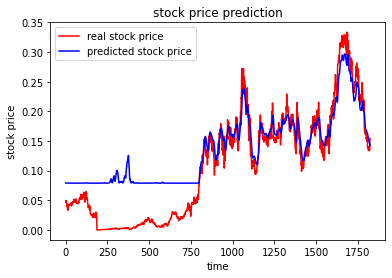

In [14]:
plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()